## Example for extracting datasets
>(to be used as predictors in a statistical mode)

This notebook exemplifies how to use automated functions to extract and store datasets given a polygon (or a set of polygons). The functions will extract all the datasets in the same dimension and geographical extent and parameters (i.e. all datapoints will have the same coordinates).

At the end the datasets are saved into a folder ready to be used into a statistical model.


In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

In [2]:
from raster_api.models import raster_models as models
import utilities.data_extraction as de
from datapipelines import paper2 as p2


## Rebuilding polygons from obtained pseudio absences

In [3]:
from django.contrib.gis.geos import Point, Polygon
xcoord = -99.76
ycoord = 17.55
p = Point(xcoord,ycoord,srid=4326)
radii = np.linspace(0.08,1, 10)
polys = map(lambda r : p.buffer(r),radii)


In [4]:
## Run this if you only one to generate the predictor stack for a single polygon
#tiki = de.compilePredictorRasterStack(polys[0],200,200,models,as_dataframe=False)

In [5]:
from ecoregions.models import LandUseConabio

In [6]:
## Prepare the structure to retrieve the interested fields from the vector data.
# Please  include the NaNs definition.
from ecoregions.models import TerrEcoregions,InegiIV,LandUseConabio
vectsel = [[TerrEcoregions,['wwf_mhtnum','wwf_mhtnam'],[np.nan,'NaN']],
           [InegiIV,['covid','name'],[np.nan,'NaN']],
           [LandUseConabio,['cov_id','tipos'],[np.nan,'NaN']]
          ]

#vectsel = [[TerrEcoregions,['wwf_mhtnum','wwf_mhtnam'],[np.nan,'NaN']],[InegiIV,['covid','name'],[np.nan,'NaN']]]
#vectsel = [[TerrEcoregions,['wwf_mhtnum'],[np.nan]],[InegiIV,['covid'],[np.nan]]]

In [7]:
polys = [polys[4]]
%time datasets = map(lambda polygon : p2.compileRasterandVectorPredictors(polygon,100,100,models,vectsel),polys)

INFO Alligning stacked raster data to common origin...
INFO extracting info from: <class 'ecoregions.models.TerrEcoregions'> this can take some minutes
INFO extracting info from: <class 'ecoregions.models.InegiIV'> this can take some minutes
INFO extracting info from: <class 'ecoregions.models.LandUseConabio'> this can take some minutes


CPU times: user 33.1 s, sys: 2.17 s, total: 35.2 s
Wall time: 2min 10s


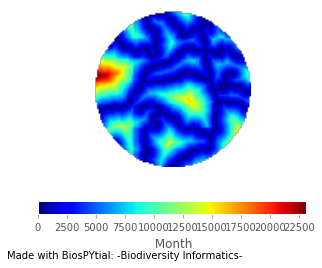

[None]

In [8]:
map(lambda r : r['rasters'][9].display_field(),datasets)

In [9]:
## Save it in Redis
import redis
import pickle
conn = redis.StrictRedis(host='redis',password='biospytial.')

In [10]:
tag = 'p-100x100-guerrero-poly4'
d = datasets[0]['df']

In [11]:
conn.set(tag,pickle.dumps(d))

True

## Let´s save it for the posterity
We need to encode the name into utf8, because.... python 2 !! 

In [12]:
dataframes = map(lambda d : d['df'],datasets)
for i,d in enumerate(dataframes):
    cad = '/outputs/presence_only_models/predictors/dataset200x200/%s-pred.csv'%i
    print(cad)
    d.to_csv(cad,encoding='utf8')

/outputs/presence_only_models/predictors/dataset200x200/0-pred.csv


In [13]:
dd= datasets[0]

In [14]:
dd

{'df':       wwf_mhtnum                                      wwf_mhtnam   covid  \
 0              2  Tropical and Subtropical Dry Broadleaf Forests  110662   
 1              2  Tropical and Subtropical Dry Broadleaf Forests  110662   
 2              2  Tropical and Subtropical Dry Broadleaf Forests  110662   
 3              2  Tropical and Subtropical Dry Broadleaf Forests   47382   
 4              2  Tropical and Subtropical Dry Broadleaf Forests   47403   
 5              2  Tropical and Subtropical Dry Broadleaf Forests   47403   
 6              2  Tropical and Subtropical Dry Broadleaf Forests  110662   
 7              2  Tropical and Subtropical Dry Broadleaf Forests  110662   
 8              2  Tropical and Subtropical Dry Broadleaf Forests   47403   
 9              2  Tropical and Subtropical Dry Broadleaf Forests   47403   
 10             2  Tropical and Subtropical Dry Broadleaf Forests   47403   
 11             2  Tropical and Subtropical Dry Broadleaf Forests   47

In [15]:
### Produce the messaging mechanism

Subscribe to channels
1;  One for input
2 for output
** Maybe store the data in the db and send the key through messages



SyntaxError: invalid syntax (<ipython-input-15-b6be6172c7e2>, line 3)